#MARCOS FERNÁNDEZ OLMEDO 

#TRABAJO BMW - NUCLIO DIGITAL SCHOOL - 0223 DS

In [505]:
#from google.colab import drive 
#drive.mount('/content/drive')

In [506]:
#importamos librería
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,MinMaxScaler



In [507]:
pd_bmw = pd.read_csv('C:\\Users\\marco\\OneDrive\\Escritorio\\Trabajo BMW\\BBDD\\bmw_pricing_v2.csv', sep = ",")


## "1.ESTRUCTURA DE LOS DATOS"

In [508]:
pd_bmw.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,BMW,118,140411.0,100.0,2012-02-01,diesel,black,convertible,True,True,False,False,True,True,True,False,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,2016-04-01,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,convertible,False,False,False,False,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,2014-07-01,diesel,red,convertible,True,True,False,False,True,True,True,True,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,2014-12-01,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400.0,2018-04-01


In [509]:
pd_bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        4841 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               4842 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4831 non-null   object 
 7   tipo_coche                   4834 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4841 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  4839 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

In [510]:
pd_bmw.describe()

,km,potencia,precio
count,4.841000e+03,4842.000000,4837.000000
mean,1.409593e+05,128.981826,15831.920612
std,6.020853e+04,38.994839,9222.630708
min,-6.400000e+01,0.000000,100.000000
25%,1.028840e+05,100.000000,10800.000000
50%,1.410800e+05,120.000000,14200.000000
75%,1.752170e+05,135.000000,18600.000000
max,1.000376e+06,423.000000,178500.000000


## "2. DETECCiÓN DE NULOS"

In [511]:
pd_bmw.isnull().sum()

marca                           2
modelo                          3
km                              2
potencia                        1
fecha_registro                  1
tipo_gasolina                   5
color                          12
tipo_coche                      9
volante_regulable               4
aire_acondicionado              2
camara_trasera                  2
asientos_traseros_plegables     4
elevalunas_electrico            2
bluetooth                       4
gps                             0
alerta_lim_velocidad            2
precio                          6
fecha_venta                     1
dtype: int64

In [512]:
#Hago un copy del DF original, para no modificarlo
pdbmw1 = pd_bmw.copy()

## "3.CONVERSIÓN DE DATOS y ELIMINAR NULOS"

Una vez vistos todos los datos que tenemos en el DataFrame, voy a empezar por modificar las columnas "Fecha de registro" y "Fecha de venta".

**Primero las cambiaré el tipo y luego, la dividiremos en dia/mes/año **

In [513]:
#Separaré la fecha de registro en año, dia y mes. Lo primero convertire los datos en datetime

from datetime import datetime

col_fecha = ['fecha_registro', 'fecha_venta']
for col in col_fecha:
  pdbmw1[col] = pd.to_datetime(pdbmw1[col], format='%Y-%m-%d')


pdbmw1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   marca                        4841 non-null   object        
 1   modelo                       4840 non-null   object        
 2   km                           4841 non-null   float64       
 3   potencia                     4842 non-null   float64       
 4   fecha_registro               4842 non-null   datetime64[ns]
 5   tipo_gasolina                4838 non-null   object        
 6   color                        4831 non-null   object        
 7   tipo_coche                   4834 non-null   object        
 8   volante_regulable            4839 non-null   object        
 9   aire_acondicionado           4841 non-null   object        
 10  camara_trasera               4841 non-null   object        
 11  asientos_traseros_plegables  4839 non-null 

In [514]:
for col in ['fecha_registro', 'fecha_venta']:
  pdbmw1[col + '_año'] = pdbmw1[col].dt.year
  pdbmw1[col + '_dia'] = pdbmw1[col].dt.day
  pdbmw1[col + '_mes'] = pdbmw1[col].dt.month


pdbmw1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   marca                        4841 non-null   object        
 1   modelo                       4840 non-null   object        
 2   km                           4841 non-null   float64       
 3   potencia                     4842 non-null   float64       
 4   fecha_registro               4842 non-null   datetime64[ns]
 5   tipo_gasolina                4838 non-null   object        
 6   color                        4831 non-null   object        
 7   tipo_coche                   4834 non-null   object        
 8   volante_regulable            4839 non-null   object        
 9   aire_acondicionado           4841 non-null   object        
 10  camara_trasera               4841 non-null   object        
 11  asientos_traseros_plegables  4839 non-null 

In [515]:
pdbmw1.isnull().sum()

marca                           2
modelo                          3
km                              2
potencia                        1
fecha_registro                  1
tipo_gasolina                   5
color                          12
tipo_coche                      9
volante_regulable               4
aire_acondicionado              2
camara_trasera                  2
asientos_traseros_plegables     4
elevalunas_electrico            2
bluetooth                       4
gps                             0
alerta_lim_velocidad            2
precio                          6
fecha_venta                     1
fecha_registro_año              1
fecha_registro_dia              1
fecha_registro_mes              1
fecha_venta_año                 1
fecha_venta_dia                 1
fecha_venta_mes                 1
dtype: int64

In [516]:
#Ahora cambiare el tipo de las columnas float64 para que sean int, ya que todos los decimales son 0. 

#Para cambiar los tipos, lo primero es eliminar los nulos de esas columnas. 

pdbmw1.dropna(subset=['fecha_venta', 'fecha_registro_año', 'fecha_registro_dia', 'fecha_registro_mes', 'fecha_venta_año', 'fecha_venta_dia', 'fecha_venta_mes'], inplace=True)



In [517]:
cols_to_convert = ['fecha_venta', 'fecha_registro_año', 'fecha_registro_dia', 'fecha_registro_mes', 'fecha_venta_año', 'fecha_venta_dia', 'fecha_venta_mes']

for col in cols_to_convert:
    if pdbmw1[col].dtype == 'float64':
        pdbmw1[col] = pdbmw1[col].astype(int)

In [518]:
#Visto los nulos que tenemos en la base de datos, haré un copy para empezar a limpiarlos de manera personalizada. 

pdbmw_sin_nulos = pdbmw1.copy()


In [519]:
pdbmw_sin_nulos[pdbmw_sin_nulos["marca"].isnull()]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,...,gps,alerta_lim_velocidad,precio,fecha_venta,fecha_registro_año,fecha_registro_dia,fecha_registro_mes,fecha_venta_año,fecha_venta_dia,fecha_venta_mes
161,NaN,520,246424.0,120.0,2010-07-01,diesel,black,estate,True,True,...,True,False,6000.0,2018-08-01,2010,1,7,2018,1,8
210,NaN,320,163879.0,120.0,2012-03-01,diesel,grey,estate,False,False,...,True,False,8600.0,2018-06-01,2012,1,3,2018,1,6


In [520]:
pdbmw_sin_nulos["marca"].value_counts()

marca
BMW    4839
Name: count, dtype: int64

In [521]:
#Los nulos de la columna marca, intuyo que serán de la marca BMW, por lo que una opción sería rellenar esos campos nulos con la informacion "BMW". De todos modos, al ser una columna que no nos aporta nada de información, optaré por eliminarla. 

pdbmw_sin_nulos.drop('marca', axis=1, inplace=True)


In [522]:
pdbmw_sin_nulos.head()

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,...,gps,alerta_lim_velocidad,precio,fecha_venta,fecha_registro_año,fecha_registro_dia,fecha_registro_mes,fecha_venta_año,fecha_venta_dia,fecha_venta_mes
0,118,140411.0,100.0,2012-02-01,diesel,black,convertible,True,True,False,...,True,False,11300.0,2018-01-01,2012,1,2,2018,1,1
1,M4,13929.0,317.0,2016-04-01,petrol,grey,convertible,True,True,False,...,True,True,69700.0,2018-02-01,2016,1,4,2018,1,2
2,320,183297.0,120.0,2012-04-01,diesel,white,convertible,False,False,False,...,True,False,10200.0,2018-02-01,2012,1,4,2018,1,2
3,420,128035.0,135.0,2014-07-01,diesel,red,convertible,True,True,False,...,True,True,25100.0,2018-02-01,2014,1,7,2018,1,2
4,425,97097.0,160.0,2014-12-01,diesel,silver,convertible,True,True,False,...,True,True,33400.0,2018-04-01,2014,1,12,2018,1,4


In [523]:
pdbmw_sin_nulos.isnull().sum()

#Mirando las demás columnas, en el caso de modelo, optaré por eliminar los nulos, ya que es un número muy pequeño y hay una gran cantidad de modelos (76). Esta columna en un futuro deberé transformarla o debatir que hacer con tantos modelos.
# Por otro lado, en km y potencia, podría hacer una media/mediana, pero creo que no es necesario alterar esos valores, siendo 3, también los eliminaré. En fecha de registro al ser 1 dato solo, también lo elimino.  

modelo                          3
km                              2
potencia                        1
fecha_registro                  0
tipo_gasolina                   5
color                          12
tipo_coche                      9
volante_regulable               4
aire_acondicionado              2
camara_trasera                  2
asientos_traseros_plegables     4
elevalunas_electrico            2
bluetooth                       4
gps                             0
alerta_lim_velocidad            2
precio                          6
fecha_venta                     0
fecha_registro_año              0
fecha_registro_dia              0
fecha_registro_mes              0
fecha_venta_año                 0
fecha_venta_dia                 0
fecha_venta_mes                 0
dtype: int64

In [524]:
pdbmw_sin_nulos["modelo"].value_counts()

modelo
320                752
520                633
318                567
X3                 438
116                358
                  ... 
M135                 1
225                  1
i8                   1
630                  1
214 Gran Tourer      1
Name: count, Length: 76, dtype: int64

In [525]:
pdbmw_sin_nulos.dropna(subset=['modelo', 'km', 'potencia', 'fecha_registro'], inplace=True)
pdbmw_sin_nulos.isnull().sum()


modelo                          0
km                              0
potencia                        0
fecha_registro                  0
tipo_gasolina                   5
color                          12
tipo_coche                      9
volante_regulable               4
aire_acondicionado              2
camara_trasera                  2
asientos_traseros_plegables     4
elevalunas_electrico            2
bluetooth                       4
gps                             0
alerta_lim_velocidad            2
precio                          6
fecha_venta                     0
fecha_registro_año              0
fecha_registro_dia              0
fecha_registro_mes              0
fecha_venta_año                 0
fecha_venta_dia                 0
fecha_venta_mes                 0
dtype: int64

In [526]:
pdbmw_sin_nulos["tipo_gasolina"].value_counts()

tipo_gasolina
diesel           4623
petrol            191
hybrid_petrol       8
Diesel              5
electro             3
Name: count, dtype: int64

In [527]:
# En la columna, "tipo_gasolina", lo primero es igualar los valores de Diesel y diesel, al ser lo mismo. 
# Por otro lado, los nulos los vamos a eliminar, ya que considero que en una muestra tan desigual, no nos van a aportar excesiva información. Dejaré las opciones hybrid_perol y electro, aunque no vayan a tener demasiada relevancia en el modelo. 

pdbmw_sin_nulos['tipo_gasolina'] = pdbmw_sin_nulos['tipo_gasolina'].replace('Diesel', 'diesel')

pdbmw_sin_nulos["tipo_gasolina"].value_counts()


tipo_gasolina
diesel           4628
petrol            191
hybrid_petrol       8
electro             3
Name: count, dtype: int64

In [528]:
pdbmw_sin_nulos.dropna(subset=['tipo_gasolina'], inplace=True)
pdbmw_sin_nulos.isnull().sum()



modelo                          0
km                              0
potencia                        0
fecha_registro                  0
tipo_gasolina                   0
color                          12
tipo_coche                      9
volante_regulable               4
aire_acondicionado              2
camara_trasera                  2
asientos_traseros_plegables     4
elevalunas_electrico            2
bluetooth                       4
gps                             0
alerta_lim_velocidad            2
precio                          6
fecha_venta                     0
fecha_registro_año              0
fecha_registro_dia              0
fecha_registro_mes              0
fecha_venta_año                 0
fecha_venta_dia                 0
fecha_venta_mes                 0
dtype: int64

In [529]:
pdbmw_sin_nulos["color"].value_counts()

color
black     1626
grey      1171
blue       706
white      533
brown      341
silver     325
red         51
beige       41
green       18
orange       6
Name: count, dtype: int64

In [530]:
#En la variable color, aunque no es un número excesivo, 12 nulos, optaré por poner "desconocido" en los valores sin rellenar. 
pdbmw_sin_nulos['color'].fillna('Desconocido', inplace=True)
pdbmw_sin_nulos["color"].value_counts()

color
black          1626
grey           1171
blue            706
white           533
brown           341
silver          325
red              51
beige            41
green            18
Desconocido      12
orange            6
Name: count, dtype: int64

In [531]:
pdbmw_sin_nulos["tipo_coche"].value_counts()

tipo_coche
estate         1595
sedan          1167
suv            1056
hatchback       699
subcompact      113
coupe           103
convertible      47
van              41
Name: count, dtype: int64

In [532]:
#Como hice en la variable color, en este caso sustituiré los nulos por "Desconocido".
pdbmw_sin_nulos['tipo_coche'].fillna('Desconocido', inplace=True)
pdbmw_sin_nulos["tipo_coche"].value_counts()

tipo_coche
estate         1595
sedan          1167
suv            1056
hatchback       699
subcompact      113
coupe           103
convertible      47
van              41
Desconocido       9
Name: count, dtype: int64

In [533]:
pdbmw_sin_nulos.info()


<class 'pandas.core.frame.DataFrame'>
Index: 4830 entries, 0 to 4842
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   modelo                       4830 non-null   object        
 1   km                           4830 non-null   float64       
 2   potencia                     4830 non-null   float64       
 3   fecha_registro               4830 non-null   datetime64[ns]
 4   tipo_gasolina                4830 non-null   object        
 5   color                        4830 non-null   object        
 6   tipo_coche                   4830 non-null   object        
 7   volante_regulable            4826 non-null   object        
 8   aire_acondicionado           4828 non-null   object        
 9   camara_trasera               4828 non-null   object        
 10  asientos_traseros_plegables  4826 non-null   object        
 11  elevalunas_electrico         4828 non-null   obj

In [534]:
# Los nulos de las siguientes variables (volante_regulable,	aire_acondicionado,	camara_trasera,	asientos_traseros_plegables,	elevalunas_electrico,	bluetooth,	gps	alerta_lim_velocidad.) son en variables booleanas.

# Entre todas, suman 20 nulos, es decir (20/4831 = 0.004%) de la muestra. Creo que para el modelo lo mejor es quitar todas. 

In [535]:
pdbmw_sin_nulos.dropna(subset=['volante_regulable', 'aire_acondicionado', 'camara_trasera', "asientos_traseros_plegables", "elevalunas_electrico","bluetooth", "gps", "alerta_lim_velocidad"], inplace=True)
pdbmw_sin_nulos.isnull().sum()


modelo                         0
km                             0
potencia                       0
fecha_registro                 0
tipo_gasolina                  0
color                          0
tipo_coche                     0
volante_regulable              0
aire_acondicionado             0
camara_trasera                 0
asientos_traseros_plegables    0
elevalunas_electrico           0
bluetooth                      0
gps                            0
alerta_lim_velocidad           0
precio                         6
fecha_venta                    0
fecha_registro_año             0
fecha_registro_dia             0
fecha_registro_mes             0
fecha_venta_año                0
fecha_venta_dia                0
fecha_venta_mes                0
dtype: int64

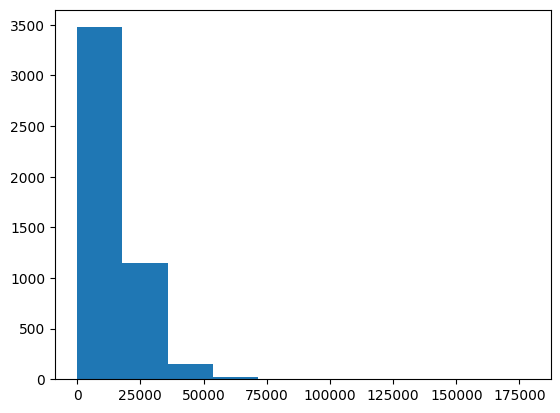

In [536]:
plt.hist(pdbmw_sin_nulos['precio']);


In [537]:
pdbmw_sin_nulos[pdbmw_sin_nulos['precio'] < 1000]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,...,gps,alerta_lim_velocidad,precio,fecha_venta,fecha_registro_año,fecha_registro_dia,fecha_registro_mes,fecha_venta_año,fecha_venta_dia,fecha_venta_mes
165,320,209208.0,135.0,2013-10-01,diesel,black,estate,False,False,False,...,False,True,800.0,2018-04-01,2013,1,10,2018,1,4
170,320,146639.0,135.0,2014-10-01,diesel,silver,estate,False,True,False,...,True,True,800.0,2018-04-01,2014,1,10,2018,1,4
171,316,159983.0,85.0,2013-05-01,diesel,grey,estate,False,False,False,...,False,True,800.0,2018-04-01,2013,1,5,2018,1,4
187,320,101013.0,120.0,2014-09-01,diesel,blue,estate,False,True,False,...,True,True,800.0,2018-05-01,2014,1,9,2018,1,5
197,320,165516.0,135.0,2013-01-01,diesel,blue,estate,False,False,False,...,True,False,800.0,2018-05-01,2013,1,1,2018,1,5
202,318,170164.0,105.0,2015-05-01,diesel,grey,estate,False,True,False,...,True,True,800.0,2018-05-01,2015,1,5,2018,1,5
213,330,127461.0,190.0,2014-02-01,diesel,silver,estate,False,True,False,...,True,True,800.0,2018-05-01,2014,1,2,2018,1,5
222,318,147097.0,105.0,2013-05-01,diesel,black,estate,False,False,False,...,False,True,800.0,2018-03-01,2013,1,5,2018,1,3
245,320,150969.0,135.0,2012-01-01,diesel,blue,estate,False,False,False,...,True,False,800.0,2018-01-01,2012,1,1,2018,1,1
327,525,130500.0,160.0,2014-04-01,diesel,silver,estate,False,True,False,...,True,True,800.0,2018-01-01,2014,1,4,2018,1,1


In [538]:
pdbmw_sin_nulos[pdbmw_sin_nulos['precio'] > 75000]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,...,gps,alerta_lim_velocidad,precio,fecha_venta,fecha_registro_año,fecha_registro_dia,fecha_registro_mes,fecha_venta_año,fecha_venta_dia,fecha_venta_mes
90,i8,12402.0,170.0,2016-01-01,hybrid_petrol,grey,coupe,True,True,False,...,False,True,95200.0,2018-04-01,2016,1,1,2018,1,4
4146,X6 M,2970.0,423.0,2016-04-01,petrol,red,suv,True,True,True,...,True,True,82400.0,2018-04-01,2016,1,4,2018,1,4
4684,X4,103222.0,140.0,2014-08-01,diesel,grey,suv,True,True,False,...,True,True,142800.0,2018-08-01,2014,1,8,2018,1,8
4753,X3,72515.0,135.0,2013-03-01,diesel,blue,suv,False,False,True,...,False,True,178500.0,2018-08-01,2013,1,3,2018,1,8


In [539]:
#En la variable precio, se observa como existen 4 outliers "claros", pero en este caso, no creo que deba modificar nada. Pueden ser outliers lógicos de coches que se hayan vendido a esos precios. Decido dejarlos tal cual.
# En cuanto a las filas nulas, modificaré su precio para no eliminarlas y que afecten lo menos posible al modelo. 

pdbmw_sin_nulos[pdbmw_sin_nulos["precio"].isnull()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,...,gps,alerta_lim_velocidad,precio,fecha_venta,fecha_registro_año,fecha_registro_dia,fecha_registro_mes,fecha_venta_año,fecha_venta_dia,fecha_venta_mes
117,420,174740.0,135.0,2013-11-01,diesel,white,coupe,True,True,True,...,True,True,NaN,2018-05-01,2013,1,11,2018,1,5
524,520,163803.0,135.0,2013-07-01,diesel,grey,estate,False,True,True,...,True,False,NaN,2018-02-01,2013,1,7,2018,1,2
539,316,34489.0,85.0,2013-07-01,diesel,black,estate,True,False,False,...,True,False,NaN,2018-02-01,2013,1,7,2018,1,2
549,318,157129.0,100.0,2013-09-01,diesel,blue,estate,True,True,True,...,True,True,NaN,2018-03-01,2013,1,9,2018,1,3
569,320,166866.0,120.0,2014-05-01,diesel,blue,estate,True,True,False,...,True,True,NaN,2018-03-01,2014,1,5,2018,1,3
584,320,114771.0,135.0,2014-05-01,diesel,blue,estate,False,True,False,...,True,False,NaN,2018-03-01,2014,1,5,2018,1,3


In [540]:
#La variable potencia es la que mas relacionada está con precio. 
# Por esto, para ajustar los precios lo máximo posible a la realidad, haré la mediana de los precios según la potencia y lo añadiré al modelo. 

In [541]:
pdbmw_sin_nulos["potencia"].value_counts()

potencia
135.0    870
120.0    783
85.0     629
100.0    567
105.0    444
        ... 
224.0      1
121.0      1
239.0      1
236.0      1
261.0      1
Name: count, Length: 61, dtype: int64

In [542]:
pdbmw_sin_nulos['precio'].mean()

15853.788509575354

In [543]:
pdbmw_sin_nulos['precio'].median()

14200.0

In [544]:
pdbmw135 = pdbmw_sin_nulos[pdbmw_sin_nulos['potencia'] == 135]
pdbmw135med = pdbmw135['precio'].median()
pdbmw135med

16300.0

In [545]:
pdbmw120 = pdbmw_sin_nulos[pdbmw_sin_nulos['potencia'] == 120]
pdbmw120med = pdbmw120['precio'].median()
pdbmw120med

14000.0

In [546]:
pdbmw100 = pdbmw_sin_nulos[pdbmw_sin_nulos['potencia'] == 100]
pdbmw100med = pdbmw100['precio'].median()
pdbmw100med

11950.0

In [547]:
pdbmw85 = pdbmw_sin_nulos[pdbmw_sin_nulos['potencia'] == 85]
pdbmw85med = pdbmw85['precio'].median()
pdbmw85med

10100.0

In [548]:
pdbmw_sin_nulos.loc[117]

modelo                                         420
km                                        174740.0
potencia                                     135.0
fecha_registro                 2013-11-01 00:00:00
tipo_gasolina                               diesel
color                                        white
tipo_coche                                   coupe
volante_regulable                             True
aire_acondicionado                            True
camara_trasera                                True
asientos_traseros_plegables                  False
elevalunas_electrico                          True
bluetooth                                     True
gps                                           True
alerta_lim_velocidad                          True
precio                                         NaN
fecha_venta                    2018-05-01 00:00:00
fecha_registro_año                            2013
fecha_registro_dia                               1
fecha_registro_mes             

In [549]:
pdbmw_sin_nulos.loc[117, 'precio'] = pdbmw135med
pdbmw_sin_nulos.loc[117]

modelo                                         420
km                                        174740.0
potencia                                     135.0
fecha_registro                 2013-11-01 00:00:00
tipo_gasolina                               diesel
color                                        white
tipo_coche                                   coupe
volante_regulable                             True
aire_acondicionado                            True
camara_trasera                                True
asientos_traseros_plegables                  False
elevalunas_electrico                          True
bluetooth                                     True
gps                                           True
alerta_lim_velocidad                          True
precio                                     16300.0
fecha_venta                    2018-05-01 00:00:00
fecha_registro_año                            2013
fecha_registro_dia                               1
fecha_registro_mes             

In [550]:
pdbmw_sin_nulos.loc[524, 'precio'] = pdbmw135med
pdbmw_sin_nulos.loc[524]

modelo                                         520
km                                        163803.0
potencia                                     135.0
fecha_registro                 2013-07-01 00:00:00
tipo_gasolina                               diesel
color                                         grey
tipo_coche                                  estate
volante_regulable                            False
aire_acondicionado                            True
camara_trasera                                True
asientos_traseros_plegables                  False
elevalunas_electrico                         False
bluetooth                                    False
gps                                           True
alerta_lim_velocidad                         False
precio                                     16300.0
fecha_venta                    2018-02-01 00:00:00
fecha_registro_año                            2013
fecha_registro_dia                               1
fecha_registro_mes             

In [551]:
pdbmw_sin_nulos.loc[584, 'precio'] = pdbmw135med
pdbmw_sin_nulos.loc[584]

modelo                                         320
km                                        114771.0
potencia                                     135.0
fecha_registro                 2014-05-01 00:00:00
tipo_gasolina                               diesel
color                                         blue
tipo_coche                                  estate
volante_regulable                            False
aire_acondicionado                            True
camara_trasera                               False
asientos_traseros_plegables                  False
elevalunas_electrico                         False
bluetooth                                    False
gps                                           True
alerta_lim_velocidad                         False
precio                                     16300.0
fecha_venta                    2018-03-01 00:00:00
fecha_registro_año                            2014
fecha_registro_dia                               1
fecha_registro_mes             

In [552]:
pdbmw_sin_nulos.loc[539, 'precio'] = pdbmw85med
pdbmw_sin_nulos.loc[539]

modelo                                         316
km                                         34489.0
potencia                                      85.0
fecha_registro                 2013-07-01 00:00:00
tipo_gasolina                               diesel
color                                        black
tipo_coche                                  estate
volante_regulable                             True
aire_acondicionado                           False
camara_trasera                               False
asientos_traseros_plegables                  False
elevalunas_electrico                         False
bluetooth                                    False
gps                                           True
alerta_lim_velocidad                         False
precio                                     10100.0
fecha_venta                    2018-02-01 00:00:00
fecha_registro_año                            2013
fecha_registro_dia                               1
fecha_registro_mes             

In [553]:
pdbmw_sin_nulos.loc[549, 'precio'] = pdbmw100med
pdbmw_sin_nulos.loc[549]

modelo                                         318
km                                        157129.0
potencia                                     100.0
fecha_registro                 2013-09-01 00:00:00
tipo_gasolina                               diesel
color                                         blue
tipo_coche                                  estate
volante_regulable                             True
aire_acondicionado                            True
camara_trasera                                True
asientos_traseros_plegables                  False
elevalunas_electrico                          True
bluetooth                                    False
gps                                           True
alerta_lim_velocidad                          True
precio                                     11950.0
fecha_venta                    2018-03-01 00:00:00
fecha_registro_año                            2013
fecha_registro_dia                               1
fecha_registro_mes             

In [554]:
pdbmw_sin_nulos.loc[569, 'precio'] = pdbmw120med
pdbmw_sin_nulos.loc[569]

modelo                                         320
km                                        166866.0
potencia                                     120.0
fecha_registro                 2014-05-01 00:00:00
tipo_gasolina                               diesel
color                                         blue
tipo_coche                                  estate
volante_regulable                             True
aire_acondicionado                            True
camara_trasera                               False
asientos_traseros_plegables                  False
elevalunas_electrico                          True
bluetooth                                     True
gps                                           True
alerta_lim_velocidad                          True
precio                                     14000.0
fecha_venta                    2018-03-01 00:00:00
fecha_registro_año                            2014
fecha_registro_dia                               1
fecha_registro_mes             

In [555]:
pdbmw_sin_nulos.isnull().sum()

#YA HEMOS ACABADO LA FASE DEL LIMPIADO DE NULOS, NO TENEMOS NINGÚN NULO EN NINGUNA COLUMNA. 

modelo                         0
km                             0
potencia                       0
fecha_registro                 0
tipo_gasolina                  0
color                          0
tipo_coche                     0
volante_regulable              0
aire_acondicionado             0
camara_trasera                 0
asientos_traseros_plegables    0
elevalunas_electrico           0
bluetooth                      0
gps                            0
alerta_lim_velocidad           0
precio                         0
fecha_venta                    0
fecha_registro_año             0
fecha_registro_dia             0
fecha_registro_mes             0
fecha_venta_año                0
fecha_venta_dia                0
fecha_venta_mes                0
dtype: int64

## "4.REVISIÓN VARIABLES PARA EL MODELO"


In [556]:
#A continuación, voy a hacer una revision de las variables, a modo que vea cuales son útiles y cuales no. 

In [557]:
pdbmw2 = pdbmw_sin_nulos.copy()
pdbmw2.head()

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,...,gps,alerta_lim_velocidad,precio,fecha_venta,fecha_registro_año,fecha_registro_dia,fecha_registro_mes,fecha_venta_año,fecha_venta_dia,fecha_venta_mes
0,118,140411.0,100.0,2012-02-01,diesel,black,convertible,True,True,False,...,True,False,11300.0,2018-01-01,2012,1,2,2018,1,1
1,M4,13929.0,317.0,2016-04-01,petrol,grey,convertible,True,True,False,...,True,True,69700.0,2018-02-01,2016,1,4,2018,1,2
2,320,183297.0,120.0,2012-04-01,diesel,white,convertible,False,False,False,...,True,False,10200.0,2018-02-01,2012,1,4,2018,1,2
3,420,128035.0,135.0,2014-07-01,diesel,red,convertible,True,True,False,...,True,True,25100.0,2018-02-01,2014,1,7,2018,1,2
4,425,97097.0,160.0,2014-12-01,diesel,silver,convertible,True,True,False,...,True,True,33400.0,2018-04-01,2014,1,12,2018,1,4


In [558]:
#Eliminamos la columna fecha registro dia, al ser todas el día 1
pdbmw2["fecha_registro_dia"].value_counts()

fecha_registro_dia
1    4810
Name: count, dtype: int64

In [559]:
pdbmw2.drop('fecha_registro_dia', axis=1, inplace=True)

In [560]:
#Eliminamos la columna fecha venta dia, al ser todas el día 1
pdbmw2["fecha_venta_dia"].value_counts()


fecha_venta_dia
1    4810
Name: count, dtype: int64

In [561]:
pdbmw2.drop('fecha_venta_dia', axis=1, inplace=True)

In [562]:
pdbmw2.head()

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,...,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,fecha_registro_año,fecha_registro_mes,fecha_venta_año,fecha_venta_mes
0,118,140411.0,100.0,2012-02-01,diesel,black,convertible,True,True,False,...,True,True,True,False,11300.0,2018-01-01,2012,2,2018,1
1,M4,13929.0,317.0,2016-04-01,petrol,grey,convertible,True,True,False,...,False,True,True,True,69700.0,2018-02-01,2016,4,2018,2
2,320,183297.0,120.0,2012-04-01,diesel,white,convertible,False,False,False,...,True,False,True,False,10200.0,2018-02-01,2012,4,2018,2
3,420,128035.0,135.0,2014-07-01,diesel,red,convertible,True,True,False,...,True,True,True,True,25100.0,2018-02-01,2014,7,2018,2
4,425,97097.0,160.0,2014-12-01,diesel,silver,convertible,True,True,False,...,False,True,True,True,33400.0,2018-04-01,2014,12,2018,4


In [563]:
#Voy a quitar las comas de las variables km, potencia y precio, ya que todas son numero enteros. 

for col in pdbmw2:
    if pdbmw2[col].dtype == 'float64':
        pdbmw2[col] = pdbmw2[col].astype(int)

In [564]:
pdbmw2.iloc[:100]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,...,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,fecha_registro_año,fecha_registro_mes,fecha_venta_año,fecha_venta_mes
0,118,140411,100,2012-02-01,diesel,black,convertible,True,True,False,...,True,True,True,False,11300,2018-01-01,2012,2,2018,1
1,M4,13929,317,2016-04-01,petrol,grey,convertible,True,True,False,...,False,True,True,True,69700,2018-02-01,2016,4,2018,2
2,320,183297,120,2012-04-01,diesel,white,convertible,False,False,False,...,True,False,True,False,10200,2018-02-01,2012,4,2018,2
3,420,128035,135,2014-07-01,diesel,red,convertible,True,True,False,...,True,True,True,True,25100,2018-02-01,2014,7,2018,2
4,425,97097,160,2014-12-01,diesel,silver,convertible,True,True,False,...,False,True,True,True,33400,2018-04-01,2014,12,2018,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,320,188335,130,2009-07-01,diesel,grey,coupe,False,False,False,...,True,False,True,True,8700,2018-05-01,2009,7,2018,5
102,M235,37619,240,2014-05-01,petrol,black,coupe,True,False,False,...,True,True,True,True,27700,2018-05-01,2014,5,2018,5
103,420,107375,135,2014-07-01,diesel,white,coupe,True,True,False,...,True,True,True,False,23800,2018-05-01,2014,7,2018,5
104,135,87304,225,2011-09-01,petrol,white,coupe,True,True,True,...,True,True,True,True,23500,2018-05-01,2011,9,2018,5


In [565]:
pdbmw2.describe()

#Veo que todas las variables son normales, excepto la fecha venta mes, que solo tiene datos hasta el mes 9. Es decir, hay 3 meses en los cuales no se recogen ventas. Por lo tanto, eliminaré esa variable. 

,km,potencia,fecha_registro,precio,fecha_venta,fecha_registro_año,fecha_registro_mes,fecha_venta_año,fecha_venta_mes
count,4.810000e+03,4810.000000,4810,4810.000000,4810,4810.000000,4810.000000,4810.000000,4810.000000
mean,1.408626e+05,128.994802,2012-11-22 23:41:26.320166400,15851.673597,2018-04-26 17:32:18.461538560,2012.467983,6.137006,2017.992100,4.935759
min,-6.400000e+01,0.000000,1990-03-01 00:00:00,100.000000,2007-08-01 00:00:00,1990.000000,1.000000,2007.000000,1.000000
25%,1.027328e+05,100.000000,2012-07-01 00:00:00,10900.000000,2018-03-01 00:00:00,2012.000000,3.000000,2018.000000,3.000000
50%,1.409475e+05,120.000000,2013-07-01 00:00:00,14200.000000,2018-05-01 00:00:00,2013.000000,6.000000,2018.000000,5.000000
75%,1.751735e+05,135.000000,2014-04-01 00:00:00,18675.000000,2018-07-01 00:00:00,2014.000000,9.000000,2018.000000,7.000000
max,1.000376e+06,423.000000,2017-11-01 00:00:00,178500.000000,2018-09-01 00:00:00,2017.000000,12.000000,2018.000000,9.000000
std,6.017344e+04,39.028936,NaN,9223.528313,NaN,2.526860,3.310340,0.275762,2.153650


In [566]:
#Eliminar variable fecha_venta_mes

pdbmw2.drop('fecha_venta_mes', axis=1, inplace=True)

In [567]:
#Por otro lado, teniendo ya las variables de dato separadas, no necesitamos las fechas de las variables fecha_registro y fecha_venta, por lo que las eliminaré

pdbmw2.drop('fecha_registro', axis=1, inplace=True)
pdbmw2.drop('fecha_venta', axis=1, inplace=True)

pdbmw2.head()



,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_registro_año,fecha_registro_mes,fecha_venta_año
0,118,140411,100,diesel,black,convertible,True,True,False,False,True,True,True,False,11300,2012,2,2018
1,M4,13929,317,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700,2016,4,2018
2,320,183297,120,diesel,white,convertible,False,False,False,False,True,False,True,False,10200,2012,4,2018
3,420,128035,135,diesel,red,convertible,True,True,False,False,True,True,True,True,25100,2014,7,2018
4,425,97097,160,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400,2014,12,2018


In [568]:
pdbmw2[pdbmw2['km'] < 0]

#Hay un dato de kms negativos, Quiero borrar este dato, ya que no tiene coherencia

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_registro_año,fecha_registro_mes,fecha_venta_año
2938,640 Gran Coupé,-64,230,diesel,black,sedan,True,True,False,True,False,False,True,True,75000,2017,3,2018


In [569]:
#Eliminar dato negativo de kms


pdbmw2 = pdbmw2.drop(pdbmw2[pdbmw2['km'] < 0].index)

In [570]:
pdbmw2.describe()

,km,potencia,precio,fecha_registro_año,fecha_registro_mes,fecha_venta_año
count,4.809000e+03,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000
mean,1.408919e+05,128.973799,15839.374090,2012.467041,6.137659,2017.992098
std,6.014536e+04,39.005798,9184.953503,2.526277,3.310375,0.275791
min,4.760000e+02,0.000000,100.000000,1990.000000,1.000000,2007.000000
25%,1.027350e+05,100.000000,10900.000000,2012.000000,3.000000,2018.000000
50%,1.409910e+05,120.000000,14200.000000,2013.000000,6.000000,2018.000000
75%,1.751740e+05,135.000000,18600.000000,2014.000000,9.000000,2018.000000
max,1.000376e+06,423.000000,178500.000000,2017.000000,12.000000,2018.000000


In [571]:
pdbmw2[pdbmw2['potencia'] <= 0]
#Quiero borrar este dato, ya que no tiene coherencia


,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_registro_año,fecha_registro_mes,fecha_venta_año
3765,X1,81770,0,diesel,white,suv,False,False,False,False,False,False,False,False,11700,2014,10,2018


In [572]:
#Eliminar dato negativo de potencia


pdbmw2 = pdbmw2.drop(pdbmw2[pdbmw2['potencia'] <= 0].index)

In [573]:
pdbmw2.describe()


,km,potencia,precio,fecha_registro_año,fecha_registro_mes,fecha_venta_año
count,4.808000e+03,4808.000000,4808.000000,4808.000000,4808.000000,4808.000000
mean,1.409042e+05,129.000624,15840.235025,2012.466722,6.136855,2017.992097
std,6.014557e+04,38.965468,9185.714765,2.526443,3.310251,0.275820
min,4.760000e+02,25.000000,100.000000,1990.000000,1.000000,2007.000000
25%,1.027522e+05,100.000000,10900.000000,2012.000000,3.000000,2018.000000
50%,1.410270e+05,120.000000,14200.000000,2013.000000,6.000000,2018.000000
75%,1.751848e+05,135.000000,18625.000000,2014.000000,9.000000,2018.000000
max,1.000376e+06,423.000000,178500.000000,2017.000000,12.000000,2018.000000


In [574]:
pdbmw2[pdbmw2.duplicated()]

#Compruebo que no existe ningún nulo. 

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_registro_año,fecha_registro_mes,fecha_venta_año


In [575]:
#Como he borrado muchas cosas, el indice debemos resetearlo. 
pdbmw2.reset_index(drop= True, inplace=True)



In [576]:
#Compruebo que todo está bien

pdbmw2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4808 entries, 0 to 4807
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   modelo                       4808 non-null   object
 1   km                           4808 non-null   int32 
 2   potencia                     4808 non-null   int32 
 3   tipo_gasolina                4808 non-null   object
 4   color                        4808 non-null   object
 5   tipo_coche                   4808 non-null   object
 6   volante_regulable            4808 non-null   object
 7   aire_acondicionado           4808 non-null   object
 8   camara_trasera               4808 non-null   object
 9   asientos_traseros_plegables  4808 non-null   object
 10  elevalunas_electrico         4808 non-null   object
 11  bluetooth                    4808 non-null   object
 12  gps                          4808 non-null   bool  
 13  alerta_lim_velocidad         4808

EN ESTE PUNTO, YA HEMOS HECHO TODA LA LIMPIEZA DE LOS DATOS, EMPEZAMOS EL PRE-PROCESAMIENTO DE LOS MISMOS. 



---

.
.
.
.
.
.
.


## "5.ANÁLISIS UNIVARIABLE" 

In [577]:
#Observación de los valores de cada variable.

for i in pdbmw2: 
  print(i, pdbmw2[i].value_counts())

modelo modelo
320                744
520                628
318                560
X3                 437
116                358
                  ... 
M135                 1
225                  1
i8                   1
630                  1
214 Gran Tourer      1
Name: count, Length: 76, dtype: int64
km km
78156     2
187698    2
196035    2
123492    2
179630    2
         ..
157157    1
193148    1
187454    1
141853    1
195840    1
Name: count, Length: 4752, dtype: int64
potencia potencia
135    870
120    783
85     629
100    567
105    444
190    318
140    166
160    152
110    140
230    117
155     99
180     62
225     49
130     46
150     43
90      40
280     32
122     30
173     25
210     21
137     19
125     16
170     14
70      11
145      9
75       9
235      7
142      6
87       6
240      5
220      5
127      5
112      5
80       4
119      4
309      4
317      4
77       3
195      3
107      3
95       3
200      3
25       2
192      2
101      2
189 

In [578]:
pdbmw2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4808 entries, 0 to 4807
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   modelo                       4808 non-null   object
 1   km                           4808 non-null   int32 
 2   potencia                     4808 non-null   int32 
 3   tipo_gasolina                4808 non-null   object
 4   color                        4808 non-null   object
 5   tipo_coche                   4808 non-null   object
 6   volante_regulable            4808 non-null   object
 7   aire_acondicionado           4808 non-null   object
 8   camara_trasera               4808 non-null   object
 9   asientos_traseros_plegables  4808 non-null   object
 10  elevalunas_electrico         4808 non-null   object
 11  bluetooth                    4808 non-null   object
 12  gps                          4808 non-null   bool  
 13  alerta_lim_velocidad         4808

### "5.1. Separar variable"


In [579]:
#El siguiente paso será categorizar todas nuestras variables en categoricas, numérica y booleanas.

In [580]:
#Todas las variables booleanas están como "Object".

pdbmw2['gps'] = pdbmw2['gps'].astype('object')

pdbmw2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4808 entries, 0 to 4807
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   modelo                       4808 non-null   object
 1   km                           4808 non-null   int32 
 2   potencia                     4808 non-null   int32 
 3   tipo_gasolina                4808 non-null   object
 4   color                        4808 non-null   object
 5   tipo_coche                   4808 non-null   object
 6   volante_regulable            4808 non-null   object
 7   aire_acondicionado           4808 non-null   object
 8   camara_trasera               4808 non-null   object
 9   asientos_traseros_plegables  4808 non-null   object
 10  elevalunas_electrico         4808 non-null   object
 11  bluetooth                    4808 non-null   object
 12  gps                          4808 non-null   object
 13  alerta_lim_velocidad         4808

In [581]:
pdbmw2["fecha_registro_año"].dtype.kind

'i'

In [582]:
target= ["PRECIO"]

In [583]:
def obtener_lista_variables(dataset):
    lista_numericas=[]
    lista_boolean=[]
    lista_categoricas=[]
    for i in dataset:
        if    (dataset[i].dtype.kind=="f" or dataset[i].dtype.kind=="i") and len(dataset[i].unique())!= 2  and i not in target:
              lista_numericas.append(i)
        elif  (dataset[i].dtype.kind=="f" or dataset[i].dtype.kind=="i" or dataset[i].dtype.kind=="O" or dataset[i].dtype.kind=="bool")  and len(dataset[i].unique())== 2  and i not in target:
              lista_boolean.append(i)
        elif  (dataset[i].dtype.kind=="O")  and i not in target:
              lista_categoricas.append(i)
                
    return lista_numericas, lista_boolean, lista_categoricas

In [584]:
lista_numericas, lista_boolean, lista_categoricas= obtener_lista_variables(pdbmw2)

In [585]:
lista_categoricas

['modelo', 'tipo_gasolina', 'color', 'tipo_coche']

In [586]:
lista_boolean

['volante_regulable',
 'aire_acondicionado',
 'camara_trasera',
 'asientos_traseros_plegables',
 'elevalunas_electrico',
 'bluetooth',
 'gps',
 'alerta_lim_velocidad']

In [587]:
lista_numericas 

['km',
 'potencia',
 'precio',
 'fecha_registro_año',
 'fecha_registro_mes',
 'fecha_venta_año']

## "6.LOGICA DE LAS VARIABLES"


In [588]:

#Durante todo el proceso, he ido eliminando o modificando variables para conseguir que tuvieran lógica. Ahora, con las que me he quedado revisaré que tengan logica todas. 

for i in lista_categoricas: 
  print(pdbmw2[i].value_counts())

modelo
320                744
520                628
318                560
X3                 437
116                358
                  ... 
M135                 1
225                  1
i8                   1
630                  1
214 Gran Tourer      1
Name: count, Length: 76, dtype: int64
tipo_gasolina
diesel           4606
petrol            191
hybrid_petrol       8
electro             3
Name: count, dtype: int64
color
black          1617
grey           1167
blue            704
white           528
brown           340
silver          324
red              51
beige            41
green            18
Desconocido      12
orange            6
Name: count, dtype: int64
tipo_coche
estate         1581
sedan          1166
suv            1055
hatchback       699
subcompact      113
coupe            97
convertible      47
van              41
Desconocido       9
Name: count, dtype: int64


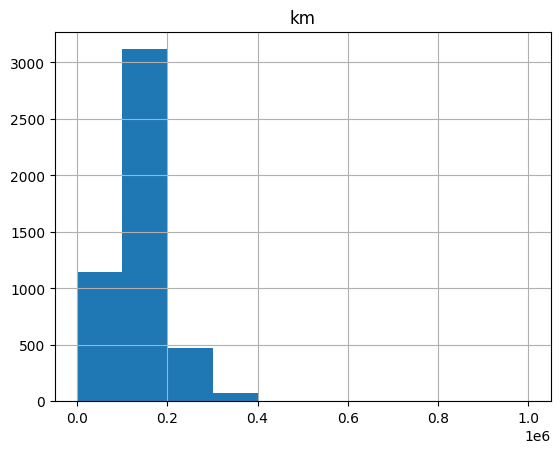

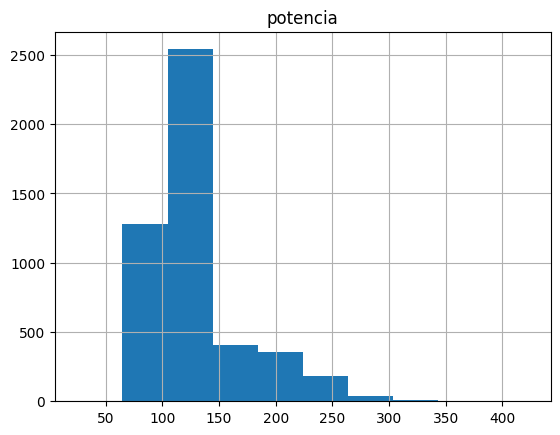

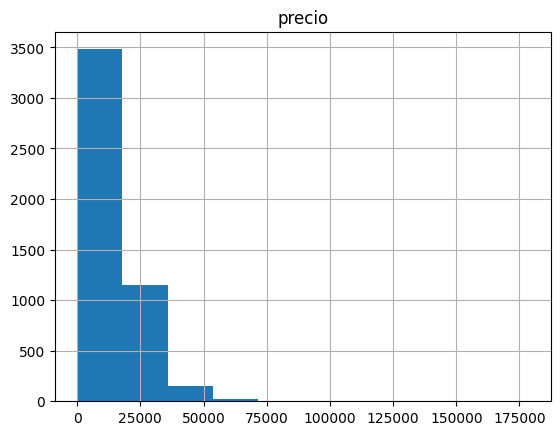

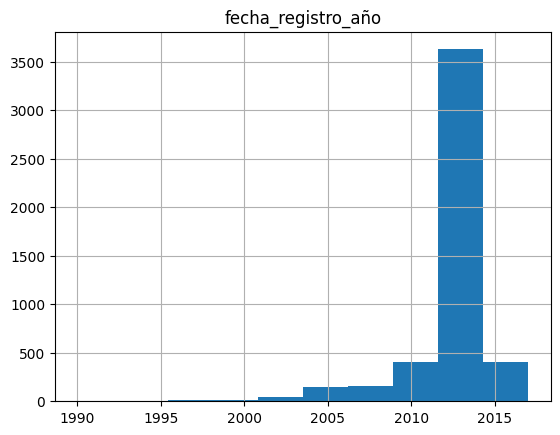

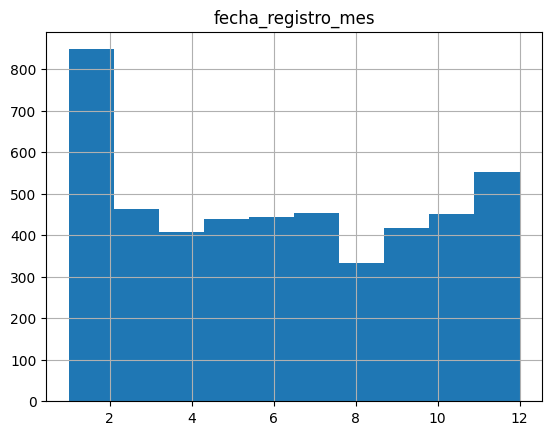

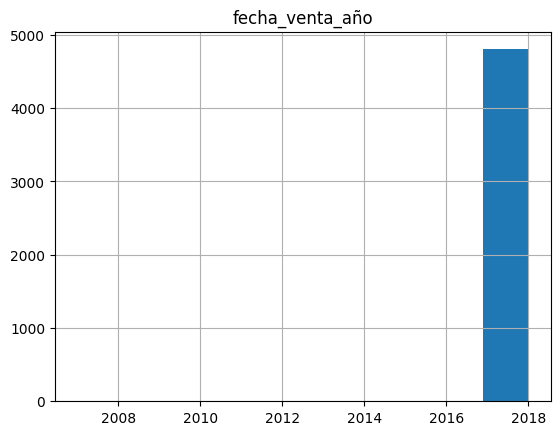

In [589]:
#Es esta lista, creo que todas las columnas tienen valor.. Aún así, opino que la columna "modelo" es demasado grande en cuanto a categorías. Se debería modificar teniendo mayor información sobre los modelos que puedan ser parecidos o meterse en el mismo grupo.

#Ahora voy a observar las numéricas. 

# al ser numéricas, lo haremos con un histograma
for i in lista_numericas: 
  pdbmw2.hist(i)

In [590]:
#La fecha de venta año, no tiene sentido actualmente, ya que solo recoge datos de 2018. Supongo que esta lista se comenzó a hacer en 2018, por lo que solo tiene datos del unico año que se recogieron datos. La eliminaré por no aportarme nada "de momento" al modelo. 

pdbmw2.drop('fecha_venta_año', axis=1, inplace=True)

In [591]:
pdbmw2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4808 entries, 0 to 4807
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   modelo                       4808 non-null   object
 1   km                           4808 non-null   int32 
 2   potencia                     4808 non-null   int32 
 3   tipo_gasolina                4808 non-null   object
 4   color                        4808 non-null   object
 5   tipo_coche                   4808 non-null   object
 6   volante_regulable            4808 non-null   object
 7   aire_acondicionado           4808 non-null   object
 8   camara_trasera               4808 non-null   object
 9   asientos_traseros_plegables  4808 non-null   object
 10  elevalunas_electrico         4808 non-null   object
 11  bluetooth                    4808 non-null   object
 12  gps                          4808 non-null   object
 13  alerta_lim_velocidad         4808

In [592]:
pdbmw2.head()

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_registro_año,fecha_registro_mes
0,118,140411,100,diesel,black,convertible,True,True,False,False,True,True,True,False,11300,2012,2
1,M4,13929,317,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700,2016,4
2,320,183297,120,diesel,white,convertible,False,False,False,False,True,False,True,False,10200,2012,4
3,420,128035,135,diesel,red,convertible,True,True,False,False,True,True,True,True,25100,2014,7
4,425,97097,160,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400,2014,12


In [593]:
#Para comprobar las booleanas, lo haremos con los valores. 

#observamos como todos tienen sentido, ya que en la mayoría hay datos suficientes tanto en false como en true, para que sean variables relevantes. El más distante es gps, que tiene solo 322 observaciones falsas por 4486 verdaderas. Aún así lo considero válido.

for i in lista_boolean: 
  print(pdbmw2[i].value_counts())

volante_regulable
True     2648
False    2160
Name: count, dtype: int64
aire_acondicionado
True     3818
False     990
Name: count, dtype: int64
camara_trasera
False    3835
True      973
Name: count, dtype: int64
asientos_traseros_plegables
False    3851
True      957
Name: count, dtype: int64
elevalunas_electrico
False    2593
True     2215
Name: count, dtype: int64
bluetooth
False    3643
True     1165
Name: count, dtype: int64
gps
True     4486
False     322
Name: count, dtype: int64
alerta_lim_velocidad
True     2599
False    2209
Name: count, dtype: int64


## "7. PREPROCESAMIENTO"

In [594]:
#Realizo una copia de seguridad para comenzar el preprocesamiento.
pdbmw3 = pdbmw2.copy()

In [595]:
#Vamos a comprobar si hay variables que explican lo mismo. 

#para hacer esto, tenemos que convertir las variables booleanas a variables 1-0. 

for column in lista_boolean:
    pdbmw3[column] = pdbmw3[column].astype(int)

In [596]:
pdbmw3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4808 entries, 0 to 4807
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   modelo                       4808 non-null   object
 1   km                           4808 non-null   int32 
 2   potencia                     4808 non-null   int32 
 3   tipo_gasolina                4808 non-null   object
 4   color                        4808 non-null   object
 5   tipo_coche                   4808 non-null   object
 6   volante_regulable            4808 non-null   int32 
 7   aire_acondicionado           4808 non-null   int32 
 8   camara_trasera               4808 non-null   int32 
 9   asientos_traseros_plegables  4808 non-null   int32 
 10  elevalunas_electrico         4808 non-null   int32 
 11  bluetooth                    4808 non-null   int32 
 12  gps                          4808 non-null   int32 
 13  alerta_lim_velocidad         4808

In [597]:
#No existen variables que expliquen lo mismo. Vemos como hay variables que influyen mucho en el precio como son la potencia y el año de registro, cosa que considero lógica. No eliminaré ninguna variabe. 

# Selecciona solo las columnas numéricas
columnas_numericas = pdbmw3.select_dtypes(include=['int32'])

# Calcula la matriz de correlación solo para las columnas numéricas
correlacion = columnas_numericas.corr()

# Ahora 'correlacion' contiene la matriz de correlación solo para las columnas numéricas
print(correlacion)

                                   km  potencia  volante_regulable  \
km                           1.000000 -0.048581           0.064846   
potencia                    -0.048581  1.000000           0.326663   
volante_regulable            0.064846  0.326663           1.000000   
aire_acondicionado           0.010806  0.200304           0.306329   
camara_trasera               0.002628  0.312688           0.253025   
asientos_traseros_plegables -0.051130  0.448840           0.231365   
elevalunas_electrico         0.048350  0.342406           0.280257   
bluetooth                   -0.029474  0.231947           0.133085   
gps                          0.154764  0.004895           0.241441   
alerta_lim_velocidad        -0.041926  0.489632           0.224528   
precio                      -0.408019  0.639092           0.267936   
fecha_registro_año          -0.505453  0.081887          -0.065692   
fecha_registro_mes          -0.018110  0.000336          -0.033905   

                   

array([[<Axes: title={'center': 'precio'}>]], dtype=object)

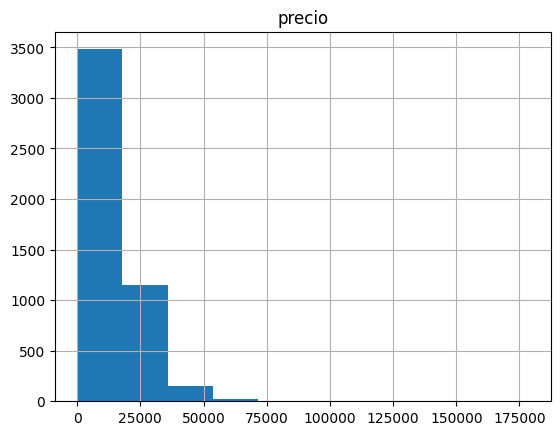

In [598]:
#Analisis de la variable precio. Como he dicho anteriormente, hay precios que considero que pueden ser outliers tanto por arriba como por abajo, por que se salen de la normalidad de precios, pero que son coherentes si los analizamos según los coches a los que se refieren, por lo que no los eliminaré. 

pdbmw3.hist("precio")

<Axes: xlabel='precio'>

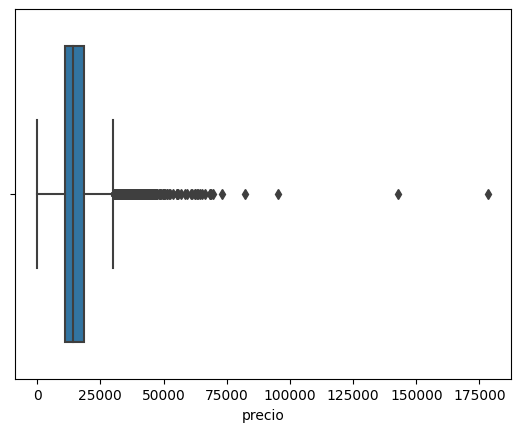

In [599]:
sns.boxplot(x=pdbmw3["precio"])

array([[<Axes: title={'center': 'LOG_PRECIO'}>]], dtype=object)

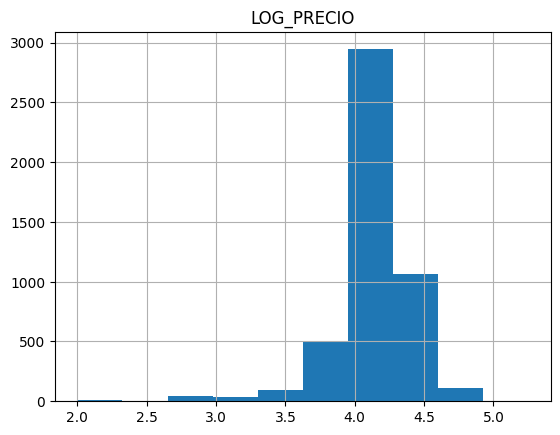

In [600]:
#Es importante que la distribución TARGET, en este caso el precio, sea lo mas cercana a la disribución normal. Lo hare en una variable nueva para no modificar la orignal. 

pdbmw3["LOG_PRECIO"] = np.log10(pdbmw3["precio"])

pdbmw3.hist("LOG_PRECIO")

<Axes: xlabel='LOG_PRECIO'>

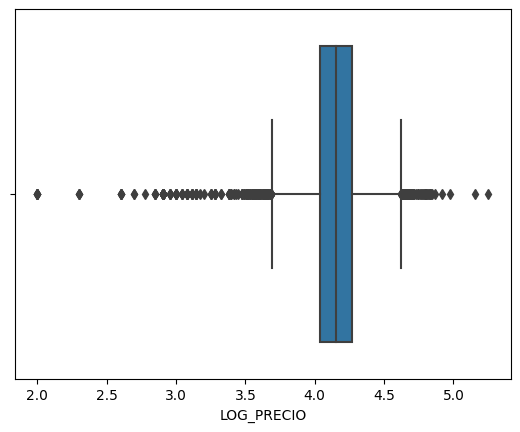

In [601]:
sns.boxplot(x=pdbmw3["LOG_PRECIO"])

In [602]:
#La distribución se asemeja mas en su distribución a una normal, pero al hacer el boxplot sigue teniendo muchas outliers.

<Axes: xlabel='modelo', ylabel='precio'>

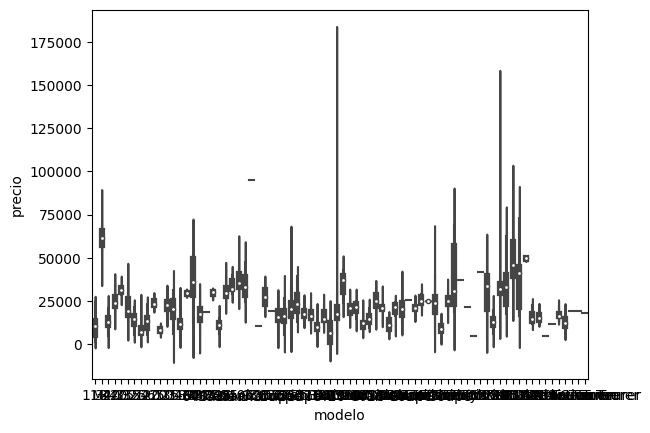

In [603]:
"Target vs variables independientes"

#Veré como afectan de forma individual las variables al precio. Las categóricas. 

sns.violinplot( x= "modelo", y = "precio" , data = pdbmw3 )

#En este grafico es muy complicado ver, al haber tantas variables.


<Axes: xlabel='tipo_gasolina', ylabel='precio'>

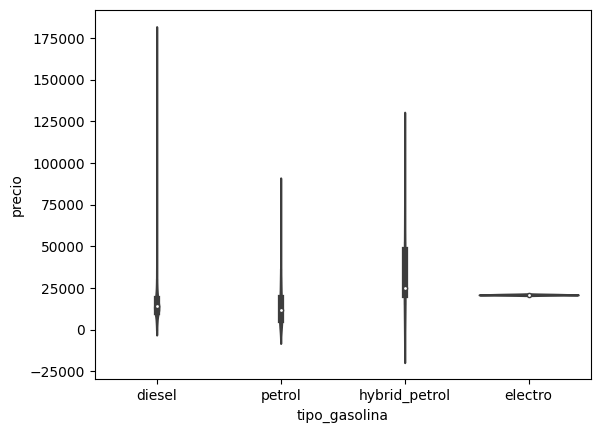

In [604]:
sns.violinplot( x= "tipo_gasolina", y = "precio" , data = pdbmw3)

#Al parecer, el precio del diesel es mas estable y su media mas alta que los coches petrol. Aun asi no lo considero relevante. 


<Axes: xlabel='color', ylabel='precio'>

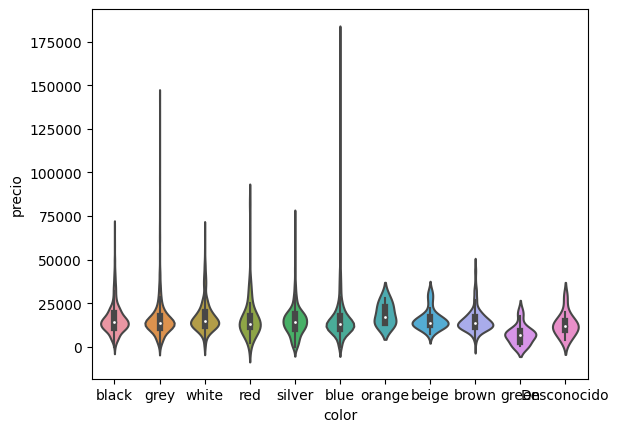

In [605]:
sns.violinplot( x= "color", y = "precio" , data = pdbmw3 )

#No resulta relevante el color en el precio. 

<Axes: xlabel='tipo_coche', ylabel='precio'>

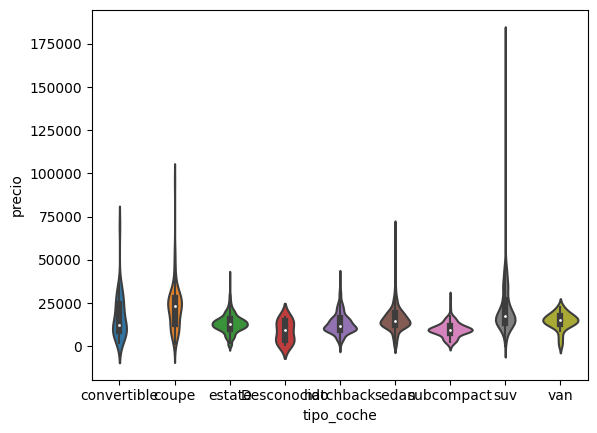

In [606]:
sns.violinplot( x= "tipo_coche", y = "precio" , data = pdbmw3 )

#Al parecer, los modelos coupe son los que más precio suelen tener. No parecen diferencias extremas. 

In [607]:
lista_categoricas

['modelo', 'tipo_gasolina', 'color', 'tipo_coche']

### "7.1Reescalado de variables"


In [608]:

#Una vez tengo las variables metidas en listas según su tipo, convertiré todas a numéricas.

pdbmw4 = pdbmw3.copy()

In [609]:
pdbmw4.head()

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_registro_año,fecha_registro_mes,LOG_PRECIO
0,118,140411,100,diesel,black,convertible,1,1,0,0,1,1,1,0,11300,2012,2,4.053078
1,M4,13929,317,petrol,grey,convertible,1,1,0,0,0,1,1,1,69700,2016,4,4.843233
2,320,183297,120,diesel,white,convertible,0,0,0,0,1,0,1,0,10200,2012,4,4.008600
3,420,128035,135,diesel,red,convertible,1,1,0,0,1,1,1,1,25100,2014,7,4.399674
4,425,97097,160,diesel,silver,convertible,1,1,0,0,0,1,1,1,33400,2014,12,4.523746


In [610]:
#Haré un Hot Encoding

In [611]:
lista_categoricas

['modelo', 'tipo_gasolina', 'color', 'tipo_coche']

In [612]:
pdbmw4 = pd.get_dummies(data = pdbmw4 , columns = lista_categoricas )

In [613]:
pdbmw4.head()

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,...,color_white,tipo_coche_Desconocido,tipo_coche_convertible,tipo_coche_coupe,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_subcompact,tipo_coche_suv,tipo_coche_van
0,140411,100,1,1,0,0,1,1,1,0,...,False,False,True,False,False,False,False,False,False,False
1,13929,317,1,1,0,0,0,1,1,1,...,False,False,True,False,False,False,False,False,False,False
2,183297,120,0,0,0,0,1,0,1,0,...,True,False,True,False,False,False,False,False,False,False
3,128035,135,1,1,0,0,1,1,1,1,...,False,False,True,False,False,False,False,False,False,False
4,97097,160,1,1,0,0,0,1,1,1,...,False,False,True,False,False,False,False,False,False,False


In [614]:
corr = pdbmw4.corr()

#corr.style.background_gradient(cmap="coolwarm")
print(corr)

                             km  potencia  volante_regulable  \
km                     1.000000 -0.048581           0.064846   
potencia              -0.048581  1.000000           0.326663   
volante_regulable      0.064846  0.326663           1.000000   
aire_acondicionado     0.010806  0.200304           0.306329   
camara_trasera         0.002628  0.312688           0.253025   
...                         ...       ...                ...   
tipo_coche_hatchback  -0.111788 -0.226116          -0.151807   
tipo_coche_sedan       0.061915  0.033732           0.054463   
tipo_coche_subcompact -0.023479 -0.158290          -0.105531   
tipo_coche_suv        -0.112729  0.238878           0.104024   
tipo_coche_van        -0.094421 -0.054284          -0.052662   

                       aire_acondicionado  camara_trasera  \
km                               0.010806        0.002628   
potencia                         0.200304        0.312688   
volante_regulable                0.306329       

In [615]:
#Ahora tenemos un gran número de columnas, que nos dan la opción de hacer regresiones pero que nos complican la visualización de la correlacion. Al no tener variables categóricas de 2 opciones, no deberemos quitar ninguna por redundantes. 

In [616]:
#A continuación, habrá que hacer un MinMaxScaler, para tener las columnas numéricas en valores que estén entre 0 y 1. Calculado entre el precio mas alto y el más bajo. 

target = ["precio", "LOG_PRECIO"]

pdbmw5MM = pdbmw4.copy()

lista_numericas, lista_boolean, lista_categoricas= obtener_lista_variables(pdbmw5MM)

In [617]:
lista_numericas

['km', 'potencia', 'fecha_registro_año', 'fecha_registro_mes']

In [618]:
minMaxResultado = MinMaxScaler()

In [619]:
#Transformamos los datos a un array (values.reshape(-1,1)) para que funcione la funcion MinMaxScaler
minMaxResultado.fit_transform(pdbmw5MM["km"].values.reshape(-1,1))


array([[0.13994899],
       [0.01345435],
       [0.18283928],
       ...,
       [0.01915892],
       [0.02744674],
       [0.19538354]])

In [620]:
#Una vez comprobado que ha funcionado, modificamos la columna en el DF. 
pdbmw5MM["km"] = minMaxResultado.fit_transform(pdbmw5MM["km"].values.reshape(-1,1))

pdbmw5MM.head()

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,...,color_white,tipo_coche_Desconocido,tipo_coche_convertible,tipo_coche_coupe,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_subcompact,tipo_coche_suv,tipo_coche_van
0,0.139949,100,1,1,0,0,1,1,1,0,...,False,False,True,False,False,False,False,False,False,False
1,0.013454,317,1,1,0,0,0,1,1,1,...,False,False,True,False,False,False,False,False,False,False
2,0.182839,120,0,0,0,0,1,0,1,0,...,True,False,True,False,False,False,False,False,False,False
3,0.127572,135,1,1,0,0,1,1,1,1,...,False,False,True,False,False,False,False,False,False,False
4,0.096631,160,1,1,0,0,0,1,1,1,...,False,False,True,False,False,False,False,False,False,False


In [621]:
#Ahora lo hago con las otras 3 columnas que tenemos dentro de las variables numéricas. 
pdbmw5MM["potencia"] = minMaxResultado.fit_transform(pdbmw5MM["potencia"].values.reshape(-1,1))
pdbmw5MM["fecha_registro_año"] = minMaxResultado.fit_transform(pdbmw5MM["fecha_registro_año"].values.reshape(-1,1))
pdbmw5MM["fecha_registro_mes"] = minMaxResultado.fit_transform(pdbmw5MM["fecha_registro_mes"].values.reshape(-1,1))

pdbmw5MM.head()[['potencia', 'fecha_registro_año', 'fecha_registro_mes']]

,potencia,fecha_registro_año,fecha_registro_mes
0,0.188442,0.814815,0.090909
1,0.733668,0.962963,0.272727
2,0.238693,0.814815,0.272727
3,0.276382,0.888889,0.545455
4,0.339196,0.888889,1.000000


FINALMENTE YA TENEMOS TODA LA BASE DE DATOS TRANSFORMADA EN FORMA NUMÉRICA, POR LO QUE PODREMOS HACER NUSTRO MODELO PARA PREDECIR EL PRECIO. 

In [622]:
#Guardaré el proceso en un pickle, para que el archivo sea independiente de Colab.

In [623]:
pdbmwfinal = pdbmw5MM.copy()

In [624]:
pdbmwfinal.head()

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,...,color_white,tipo_coche_Desconocido,tipo_coche_convertible,tipo_coche_coupe,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_subcompact,tipo_coche_suv,tipo_coche_van
0,0.139949,0.188442,1,1,0,0,1,1,1,0,...,False,False,True,False,False,False,False,False,False,False
1,0.013454,0.733668,1,1,0,0,0,1,1,1,...,False,False,True,False,False,False,False,False,False,False
2,0.182839,0.238693,0,0,0,0,1,0,1,0,...,True,False,True,False,False,False,False,False,False,False
3,0.127572,0.276382,1,1,0,0,1,1,1,1,...,False,False,True,False,False,False,False,False,False,False
4,0.096631,0.339196,1,1,0,0,0,1,1,1,...,False,False,True,False,False,False,False,False,False,False


In [628]:
import pickle 

pdbmwfinal = pd.DataFrame(pdbmwfinal)

# Guardar el DataFrame en un archivo Pickle
nombre_archivo_pickle = 'BMW_pickle_final.pickle'

with open(nombre_archivo_pickle, 'wb') as archivo:
    pickle.dump(pdbmwfinal, archivo)

print(f'DataFrame guardado en {nombre_archivo_pickle}')

DataFrame guardado en BMW_pickle_final.pickle
